Processando arquivo de sinal...
Processando evento 0...
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------
Processando eve

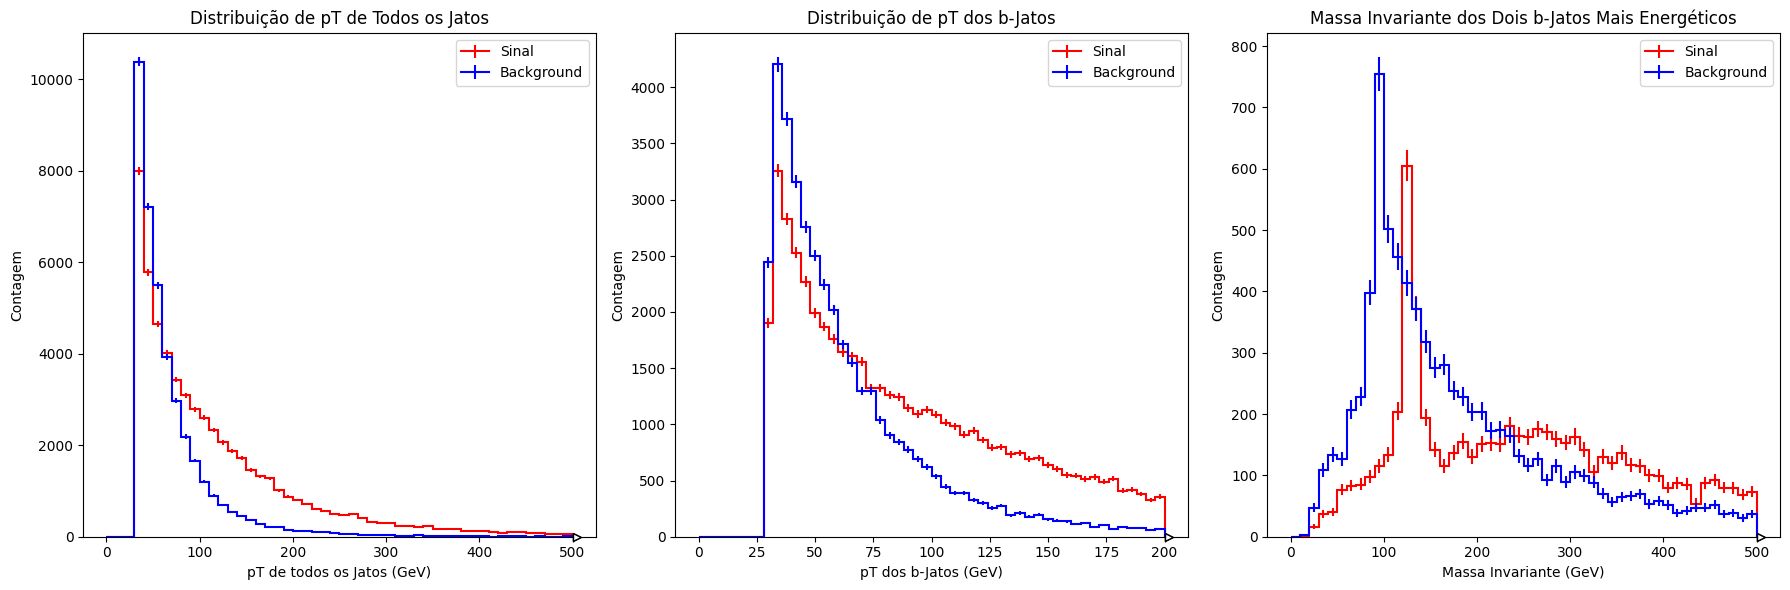

In [1]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Definir arquivos de entrada
sinal_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/background_pp_jjmumu.hepmc'

# Definir histogramas
histo_jets_pt_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_jets_pt_bg = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_pt_sinal = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_pt_bg = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_mass_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_mass_bg = hist.Hist.new.Reg(50, 0., 500.).Double()

# Função para processar um único evento
def process_event(event, histo_all_jets, histo_bjets_pt, histo_mass):
    particles = [p for p in event.particles if p.status == 1]
    
    fj_particles = [
        fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        for p in particles
    ]
    
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(30.0)
    
    for jet in jets:
        histo_all_jets.fill(jet.pt())

    # Identificar jatos b
    b_jets = [jet for jet in jets if is_b_tagged(jet, particles)]
    
    for jet in b_jets:
        histo_bjets_pt.fill(jet.pt())

    # Calcular massa invariante dos dois b-jatos mais energéticos
    if len(b_jets) >= 2:
        b_jets = sorted(b_jets, key=lambda j: j.e(), reverse=True)[:2]
        histo_mass.fill(invariant_mass(b_jets[0], b_jets[1]))

# Função para verificar se um jato é b-tagged
def is_b_tagged(jet, particles, cone_radius=0.4):
    secondary_vertex_displacement = []
    for p in particles:
        if p.production_vertex and p.production_vertex.position:
            r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
            secondary_vertex_displacement.append(r_prod)
    
    if secondary_vertex_displacement:
        return np.mean(secondary_vertex_displacement) > 1.0
    return False

# Função para calcular a massa invariante entre dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Processar arquivos sem armazenar tudo na memória
def process_file(hepmc_file, histo_all_jets, histo_bjets_pt, histo_mass, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar número de eventos processados
                break
            if i % 500 == 0:
                print(f"Processando evento {i}...")
            process_event(event, histo_all_jets, histo_bjets_pt, histo_mass)

# Processar eventos do sinal e background
print("Processando arquivo de sinal...")
process_file(sinal_file, histo_jets_pt_sinal, histo_bjets_pt_sinal, histo_bjets_mass_sinal)

print("Processando arquivo de background...")
process_file(background_file, histo_jets_pt_bg, histo_bjets_pt_bg, histo_bjets_mass_bg)

# Plotar histogramas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

histo_jets_pt_sinal.plot(ax=ax[0], label='Sinal', color='red')
histo_jets_pt_bg.plot(ax=ax[0], label='Background', color='blue')
ax[0].set(xlabel='pT de todos os Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT de Todos os Jatos')
ax[0].legend()

histo_bjets_pt_sinal.plot(ax=ax[1], label='Sinal', color='red')
histo_bjets_pt_bg.plot(ax=ax[1], label='Background', color='blue')
ax[1].set(xlabel='pT dos b-Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT dos b-Jatos')
ax[1].legend()

histo_bjets_mass_sinal.plot(ax=ax[2], label='Sinal', color='red')
histo_bjets_mass_bg.plot(ax=ax[2], label='Background', color='blue')
ax[2].set(xlabel='Massa Invariante (GeV)', ylabel='Contagem', title='Massa Invariante dos Dois b-Jatos Mais Energéticos')
ax[2].legend()

plt.tight_layout()
plt.show()


Processando arquivo de sinal...
Processando evento 0...
Processando evento 500...
Processando evento 1000...
Processando evento 1500...
Processando evento 2000...
Processando evento 2500...
Processando evento 3000...
Processando evento 3500...
Processando evento 4000...
Processando evento 4500...
Processando evento 5000...
Processando evento 5500...
Processando evento 6000...
Processando evento 6500...
Processando evento 7000...
Processando evento 7500...
Processando evento 8000...
Processando evento 8500...
Processando evento 9000...
Processando evento 9500...
Processando arquivo de background...
Processando evento 0...
Processando evento 500...
Processando evento 1000...
Processando evento 1500...
Processando evento 2000...
Processando evento 2500...
Processando evento 3000...
Processando evento 3500...
Processando evento 4000...
Processando evento 4500...
Processando evento 5000...
Processando evento 5500...
Processando evento 6000...
Processando evento 6500...
Processando evento 70

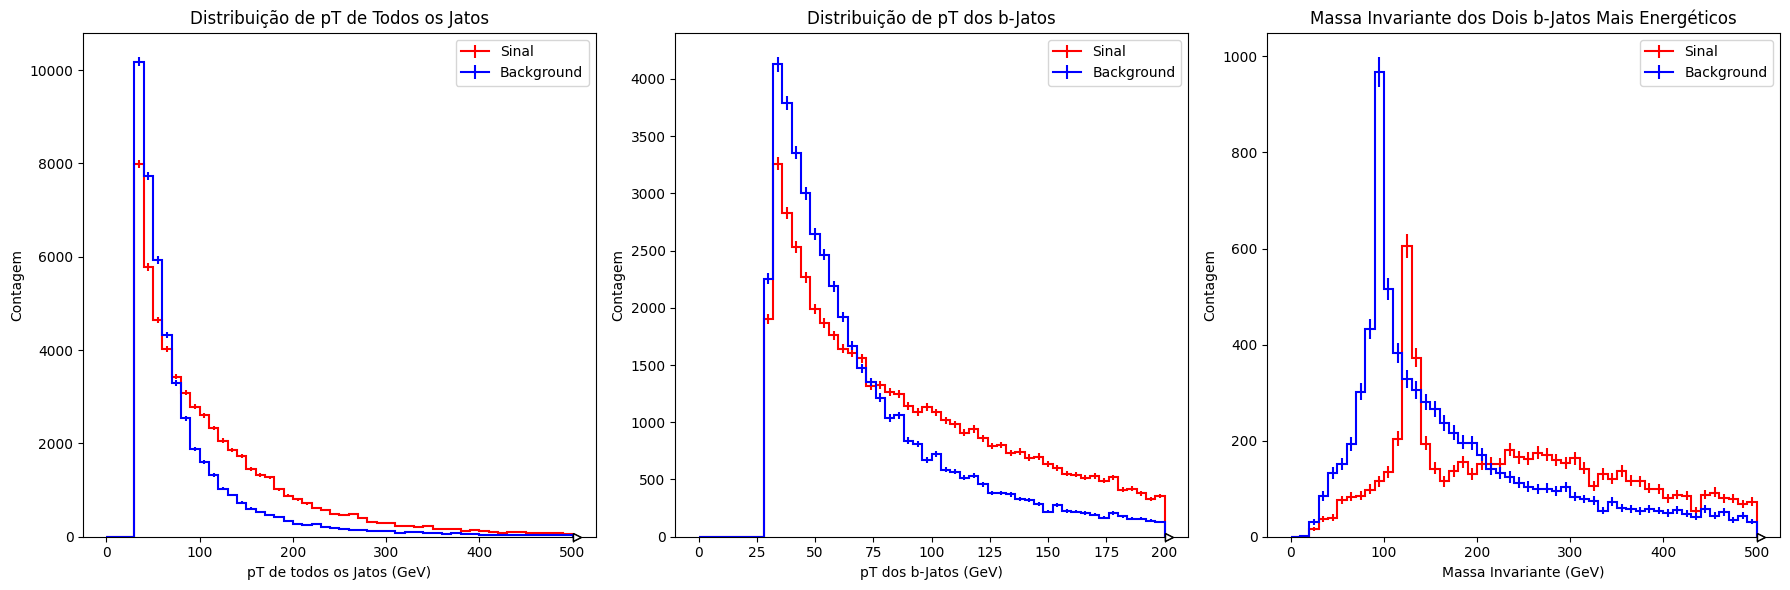

In [2]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Definir arquivos de entrada
sinal_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/pp_zz_background_nobornQCD.hepmc'

# Definir histogramas
histo_jets_pt_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_jets_pt_bg = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_pt_sinal = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_pt_bg = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_mass_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_mass_bg = hist.Hist.new.Reg(50, 0., 500.).Double()

# Função para processar um único evento
def process_event(event, histo_all_jets, histo_bjets_pt, histo_mass):
    particles = [p for p in event.particles if p.status == 1]
    
    fj_particles = [
        fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        for p in particles
    ]
    
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(30.0)
    
    for jet in jets:
        histo_all_jets.fill(jet.pt())

    # Identificar jatos b
    b_jets = [jet for jet in jets if is_b_tagged(jet, particles)]
    
    for jet in b_jets:
        histo_bjets_pt.fill(jet.pt())

    # Calcular massa invariante dos dois b-jatos mais energéticos
    if len(b_jets) >= 2:
        b_jets = sorted(b_jets, key=lambda j: j.e(), reverse=True)[:2]
        histo_mass.fill(invariant_mass(b_jets[0], b_jets[1]))

# Função para verificar se um jato é b-tagged
def is_b_tagged(jet, particles, cone_radius=0.4):
    secondary_vertex_displacement = []
    for p in particles:
        if p.production_vertex and p.production_vertex.position:
            r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
            secondary_vertex_displacement.append(r_prod)
    
    if secondary_vertex_displacement:
        return np.mean(secondary_vertex_displacement) > 1.0
    return False

# Função para calcular a massa invariante entre dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Processar arquivos sem armazenar tudo na memória
def process_file(hepmc_file, histo_all_jets, histo_bjets_pt, histo_mass, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar número de eventos processados
                break
            if i % 500 == 0:
                print(f"Processando evento {i}...")
            process_event(event, histo_all_jets, histo_bjets_pt, histo_mass)

# Processar eventos do sinal e background
print("Processando arquivo de sinal...")
process_file(sinal_file, histo_jets_pt_sinal, histo_bjets_pt_sinal, histo_bjets_mass_sinal)

print("Processando arquivo de background...")
process_file(background_file, histo_jets_pt_bg, histo_bjets_pt_bg, histo_bjets_mass_bg)

# Plotar histogramas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

histo_jets_pt_sinal.plot(ax=ax[0], label='Sinal', color='red')
histo_jets_pt_bg.plot(ax=ax[0], label='Background', color='blue')
ax[0].set(xlabel='pT de todos os Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT de Todos os Jatos')
ax[0].legend()

histo_bjets_pt_sinal.plot(ax=ax[1], label='Sinal', color='red')
histo_bjets_pt_bg.plot(ax=ax[1], label='Background', color='blue')
ax[1].set(xlabel='pT dos b-Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT dos b-Jatos')
ax[1].legend()

histo_bjets_mass_sinal.plot(ax=ax[2], label='Sinal', color='red')
histo_bjets_mass_bg.plot(ax=ax[2], label='Background', color='blue')
ax[2].set(xlabel='Massa Invariante (GeV)', ylabel='Contagem', title='Massa Invariante dos Dois b-Jatos Mais Energéticos')
ax[2].legend()

plt.tight_layout()
plt.show()


Processando arquivo de sinal...
Processando evento 0...
Processando evento 500...
Processando evento 1000...
Processando evento 1500...
Processando evento 2000...
Processando evento 2500...
Processando evento 3000...
Processando evento 3500...
Processando evento 4000...
Processando evento 4500...
Processando evento 5000...
Processando evento 5500...
Processando evento 6000...
Processando evento 6500...
Processando evento 7000...
Processando evento 7500...
Processando evento 8000...
Processando evento 8500...
Processando evento 9000...
Processando evento 9500...
Processando arquivo de background...
Processando evento 0...
Processando evento 500...
Processando evento 1000...
Processando evento 1500...
Processando evento 2000...
Processando evento 2500...
Processando evento 3000...
Processando evento 3500...
Processando evento 4000...
Processando evento 4500...
Processando evento 5000...
Processando evento 5500...
Processando evento 6000...
Processando evento 6500...
Processando evento 70

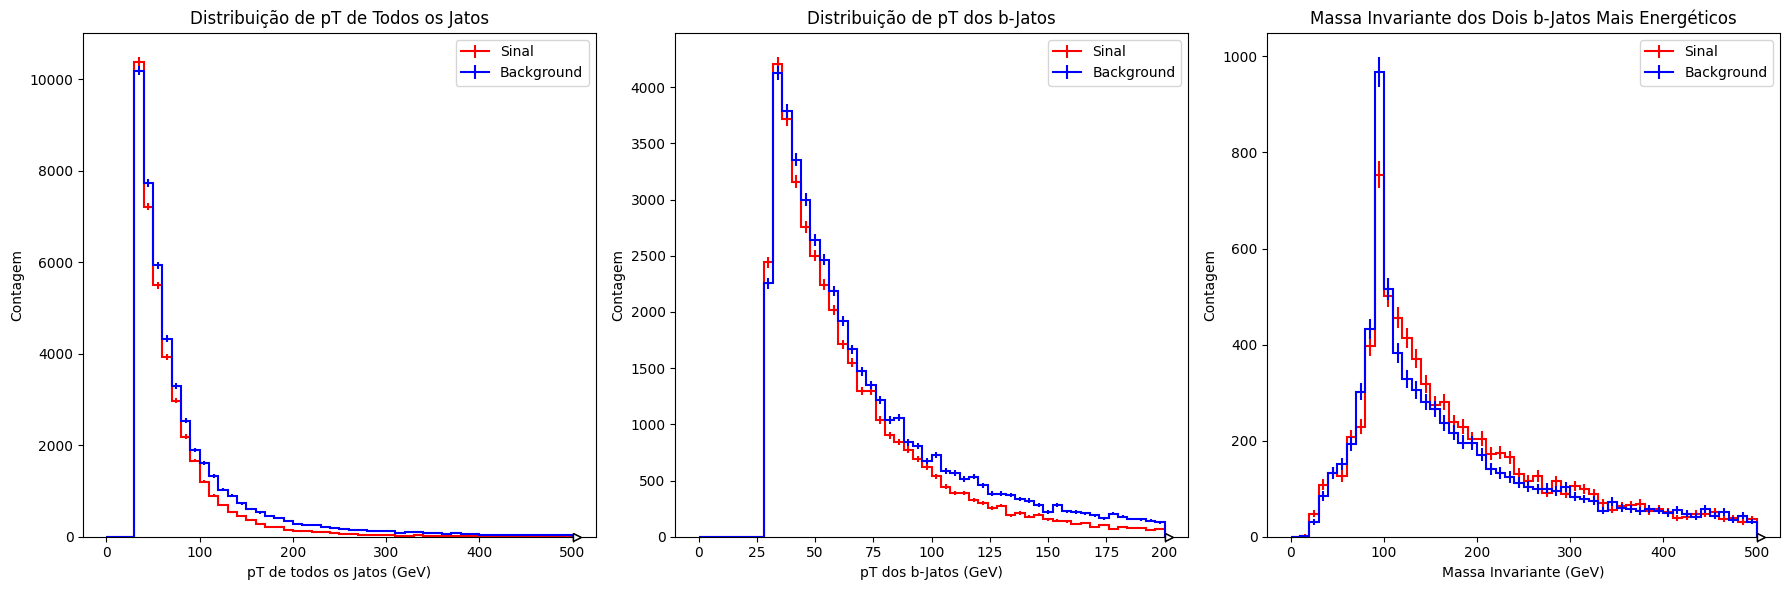

In [3]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Definir arquivos de entrada
sinal_file = '/home/levi/Documentos/Sinal_background/background_pp_jjmumu.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/pp_zz_background_nobornQCD.hepmc'

# Definir histogramas
histo_jets_pt_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_jets_pt_bg = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_pt_sinal = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_pt_bg = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_mass_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_mass_bg = hist.Hist.new.Reg(50, 0., 500.).Double()

# Função para processar um único evento
def process_event(event, histo_all_jets, histo_bjets_pt, histo_mass):
    particles = [p for p in event.particles if p.status == 1]
    
    fj_particles = [
        fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        for p in particles
    ]
    
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(30.0)
    
    for jet in jets:
        histo_all_jets.fill(jet.pt())

    # Identificar jatos b
    b_jets = [jet for jet in jets if is_b_tagged(jet, particles)]
    
    for jet in b_jets:
        histo_bjets_pt.fill(jet.pt())

    # Calcular massa invariante dos dois b-jatos mais energéticos
    if len(b_jets) >= 2:
        b_jets = sorted(b_jets, key=lambda j: j.e(), reverse=True)[:2]
        histo_mass.fill(invariant_mass(b_jets[0], b_jets[1]))

# Função para verificar se um jato é b-tagged
def is_b_tagged(jet, particles, cone_radius=0.4):
    secondary_vertex_displacement = []
    for p in particles:
        if p.production_vertex and p.production_vertex.position:
            r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
            secondary_vertex_displacement.append(r_prod)
    
    if secondary_vertex_displacement:
        return np.mean(secondary_vertex_displacement) > 1.0
    return False

# Função para calcular a massa invariante entre dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Processar arquivos sem armazenar tudo na memória
def process_file(hepmc_file, histo_all_jets, histo_bjets_pt, histo_mass, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar número de eventos processados
                break
            if i % 500 == 0:
                print(f"Processando evento {i}...")
            process_event(event, histo_all_jets, histo_bjets_pt, histo_mass)

# Processar eventos do sinal e background
print("Processando arquivo de sinal...")
process_file(sinal_file, histo_jets_pt_sinal, histo_bjets_pt_sinal, histo_bjets_mass_sinal)

print("Processando arquivo de background...")
process_file(background_file, histo_jets_pt_bg, histo_bjets_pt_bg, histo_bjets_mass_bg)

# Plotar histogramas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

histo_jets_pt_sinal.plot(ax=ax[0], label='Sinal', color='red')
histo_jets_pt_bg.plot(ax=ax[0], label='Background', color='blue')
ax[0].set(xlabel='pT de todos os Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT de Todos os Jatos')
ax[0].legend()

histo_bjets_pt_sinal.plot(ax=ax[1], label='Sinal', color='red')
histo_bjets_pt_bg.plot(ax=ax[1], label='Background', color='blue')
ax[1].set(xlabel='pT dos b-Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT dos b-Jatos')
ax[1].legend()

histo_bjets_mass_sinal.plot(ax=ax[2], label='Sinal', color='red')
histo_bjets_mass_bg.plot(ax=ax[2], label='Background', color='blue')
ax[2].set(xlabel='Massa Invariante (GeV)', ylabel='Contagem', title='Massa Invariante dos Dois b-Jatos Mais Energéticos')
ax[2].legend()

plt.tight_layout()
plt.show()


Processando arquivo de sinal...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...
Processando arquivo de background...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...


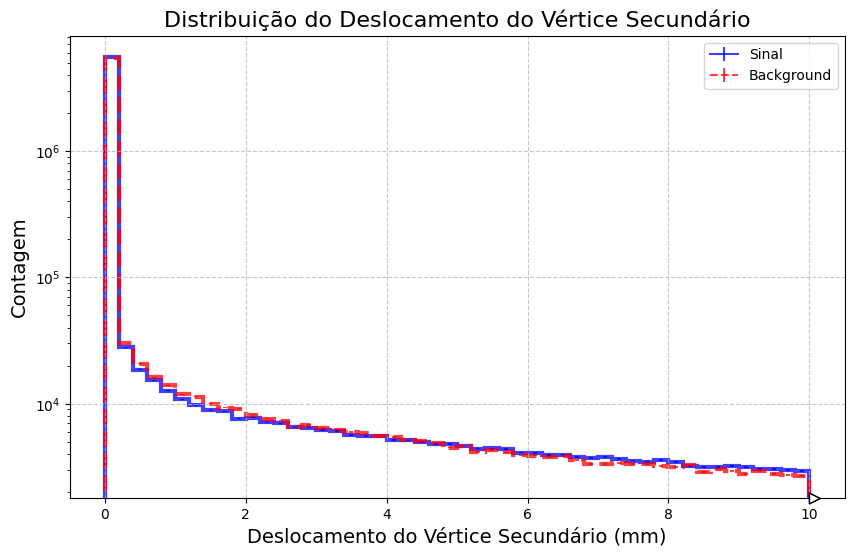

In [1]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

# Caminhos para os arquivos .hepmc
data_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/pp_zz_background_nobornQCD.hepmc'

# Definir histogramas para o deslocamento do vértice secundário
histo_data = hist.Hist.new.Reg(50, 0., 10.).Double()
histo_background = hist.Hist.new.Reg(50, 0., 10.).Double()

# Função para processar os eventos diretamente do arquivo
def process_hepmc_file(hepmc_file, histo, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar o número de eventos processados
                break
            if i % 1000 == 0:
                print(f"Processando evento {i}...")

            # Selecionar partículas finais com energia > 2.0 GeV
            particles = [p for p in event.particles if p.status == 1 and p.momentum.e > 2.0]

            for p in particles:
                if p.production_vertex and p.production_vertex.position:
                    r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
                    histo.fill(r_prod)

# Processar eventos diretamente dos arquivos
print("Processando arquivo de sinal...")
process_hepmc_file(data_file, histo_data)

print("Processando arquivo de background...")
process_hepmc_file(background_file, histo_background)

# Plotar os histogramas
plt.figure(figsize=(10, 6))
ax = plt.gca()
histo_data.plot(ax=ax, ls="-", color="blue", lw=3, alpha=0.75, label='Sinal')
histo_background.plot(ax=ax, ls="--", color="red", lw=3, alpha=0.75, label='Background')
ax.set_xlabel('Deslocamento do Vértice Secundário (mm)', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_title('Distribuição do Deslocamento do Vértice Secundário', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.legend()
plt.show()


Processando arquivo de sinal...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...
Processando arquivo de background...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...


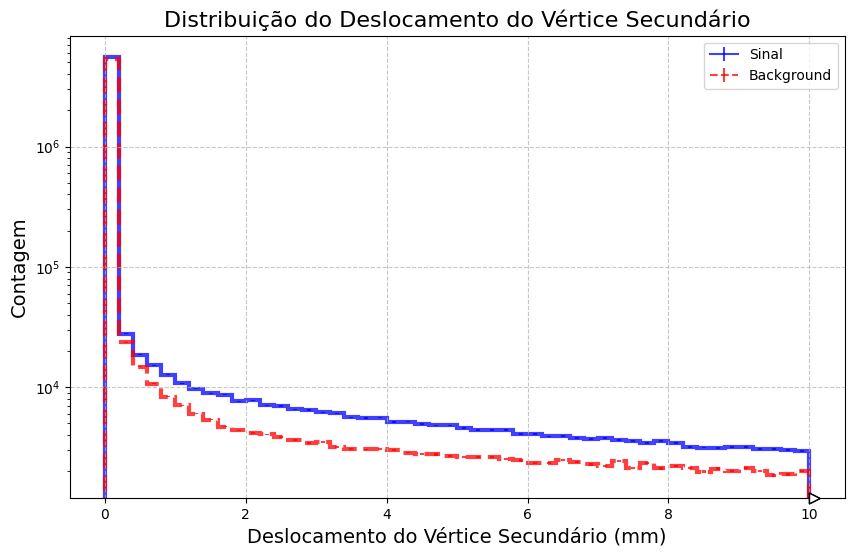

In [2]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

# Caminhos para os arquivos .hepmc
data_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/background_pp_jjmumu.hepmc'

# Definir histogramas para o deslocamento do vértice secundário
histo_data = hist.Hist.new.Reg(50, 0., 10.).Double()
histo_background = hist.Hist.new.Reg(50, 0., 10.).Double()

# Função para processar os eventos diretamente do arquivo
def process_hepmc_file(hepmc_file, histo, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar o número de eventos processados
                break
            if i % 1000 == 0:
                print(f"Processando evento {i}...")

            # Selecionar partículas finais com energia > 2.0 GeV
            particles = [p for p in event.particles if p.status == 1 and p.momentum.e > 2.0]

            for p in particles:
                if p.production_vertex and p.production_vertex.position:
                    r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
                    histo.fill(r_prod)

# Processar eventos diretamente dos arquivos
print("Processando arquivo de sinal...")
process_hepmc_file(data_file, histo_data)

print("Processando arquivo de background...")
process_hepmc_file(background_file, histo_background)

# Plotar os histogramas
plt.figure(figsize=(10, 6))
ax = plt.gca()
histo_data.plot(ax=ax, ls="-", color="blue", lw=3, alpha=0.75, label='Sinal')
histo_background.plot(ax=ax, ls="--", color="red", lw=3, alpha=0.75, label='Background')
ax.set_xlabel('Deslocamento do Vértice Secundário (mm)', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_title('Distribuição do Deslocamento do Vértice Secundário', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.legend()
plt.show()


# p p > t t~

Processando arquivo de sinal...
Processando evento 0...
#--------------------------------------------------------------------------
#                         FastJet release 3.4.2
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------
Processando eve

/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/home/levi/.local/lib/python

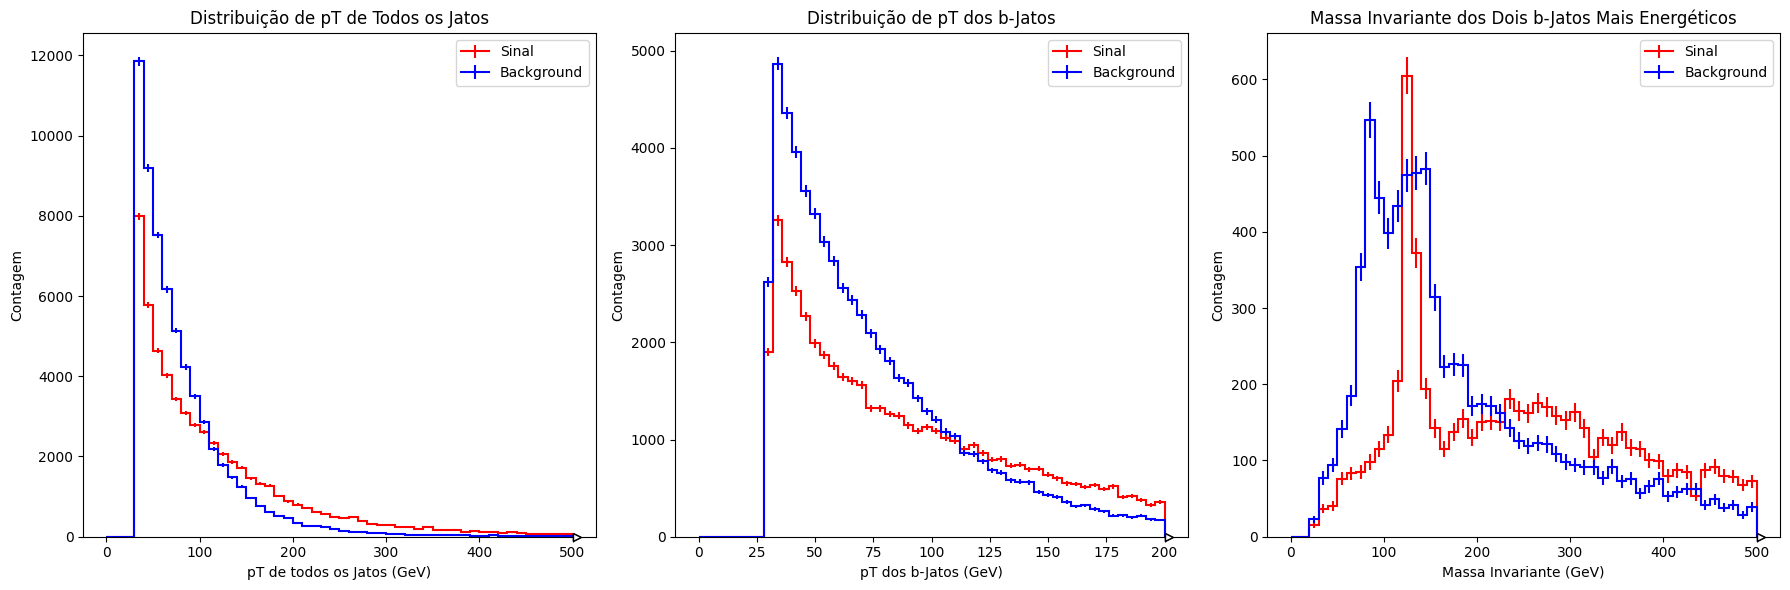

In [1]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt
import fastjet as fj

# Definir arquivos de entrada
sinal_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/pp_tt_100TeV_background.hepmc'

# Definir histogramas
histo_jets_pt_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_jets_pt_bg = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_pt_sinal = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_pt_bg = hist.Hist.new.Reg(50, 0., 200.).Double()
histo_bjets_mass_sinal = hist.Hist.new.Reg(50, 0., 500.).Double()
histo_bjets_mass_bg = hist.Hist.new.Reg(50, 0., 500.).Double()

# Função para processar um único evento
def process_event(event, histo_all_jets, histo_bjets_pt, histo_mass):
    particles = [p for p in event.particles if p.status == 1]
    
    fj_particles = [
        fj.PseudoJet(p.momentum.x, p.momentum.y, p.momentum.z, p.momentum.e)
        for p in particles
    ]
    
    jet_def = fj.JetDefinition(fj.antikt_algorithm, 0.4)
    clusterer = fj.ClusterSequence(fj_particles, jet_def)
    jets = clusterer.inclusive_jets(30.0)
    
    for jet in jets:
        histo_all_jets.fill(jet.pt())

    # Identificar jatos b
    b_jets = [jet for jet in jets if is_b_tagged(jet, particles)]
    
    for jet in b_jets:
        histo_bjets_pt.fill(jet.pt())

    # Calcular massa invariante dos dois b-jatos mais energéticos
    if len(b_jets) >= 2:
        b_jets = sorted(b_jets, key=lambda j: j.e(), reverse=True)[:2]
        histo_mass.fill(invariant_mass(b_jets[0], b_jets[1]))

# Função para verificar se um jato é b-tagged
def is_b_tagged(jet, particles, cone_radius=0.4):
    secondary_vertex_displacement = []
    for p in particles:
        if p.production_vertex and p.production_vertex.position:
            r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
            secondary_vertex_displacement.append(r_prod)
    
    if secondary_vertex_displacement:
        return np.mean(secondary_vertex_displacement) > 1.0
    return False

# Função para calcular a massa invariante entre dois jatos
def invariant_mass(jet1, jet2):
    E_tot = jet1.e() + jet2.e()
    px_tot = jet1.px() + jet2.px()
    py_tot = jet1.py() + jet2.py()
    pz_tot = jet1.pz() + jet2.pz()
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

# Processar arquivos sem armazenar tudo na memória
def process_file(hepmc_file, histo_all_jets, histo_bjets_pt, histo_mass, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar número de eventos processados
                break
            if i % 500 == 0:
                print(f"Processando evento {i}...")
            process_event(event, histo_all_jets, histo_bjets_pt, histo_mass)

# Processar eventos do sinal e background
print("Processando arquivo de sinal...")
process_file(sinal_file, histo_jets_pt_sinal, histo_bjets_pt_sinal, histo_bjets_mass_sinal)

print("Processando arquivo de background...")
process_file(background_file, histo_jets_pt_bg, histo_bjets_pt_bg, histo_bjets_mass_bg)

# Plotar histogramas
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

histo_jets_pt_sinal.plot(ax=ax[0], label='Sinal', color='red')
histo_jets_pt_bg.plot(ax=ax[0], label='Background', color='blue')
ax[0].set(xlabel='pT de todos os Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT de Todos os Jatos')
ax[0].legend()

histo_bjets_pt_sinal.plot(ax=ax[1], label='Sinal', color='red')
histo_bjets_pt_bg.plot(ax=ax[1], label='Background', color='blue')
ax[1].set(xlabel='pT dos b-Jatos (GeV)', ylabel='Contagem', title='Distribuição de pT dos b-Jatos')
ax[1].legend()

histo_bjets_mass_sinal.plot(ax=ax[2], label='Sinal', color='red')
histo_bjets_mass_bg.plot(ax=ax[2], label='Background', color='blue')
ax[2].set(xlabel='Massa Invariante (GeV)', ylabel='Contagem', title='Massa Invariante dos Dois b-Jatos Mais Energéticos')
ax[2].legend()

plt.tight_layout()
plt.show()


Processando arquivo de sinal...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...
Processando arquivo de background...
Processando evento 0...
Processando evento 1000...
Processando evento 2000...
Processando evento 3000...
Processando evento 4000...
Processando evento 5000...
Processando evento 6000...
Processando evento 7000...
Processando evento 8000...
Processando evento 9000...


/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/home/levi/.local/lib/python3.8/site-packages/mplhep/utils.py:572: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()


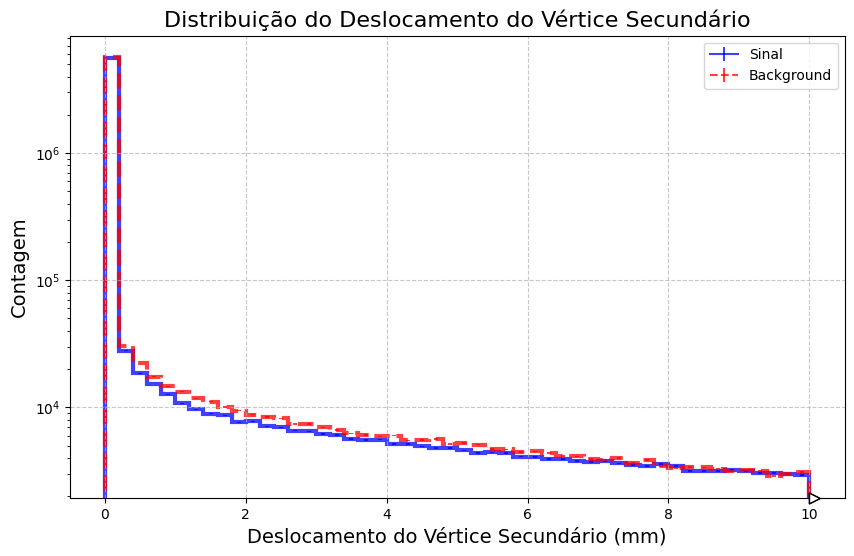

In [2]:
import pyhepmc as hep
import numpy as np
import hist
import matplotlib.pyplot as plt

# Caminhos para os arquivos .hepmc
data_file = '/home/levi/Documentos/Sinal_background/pp_hh_100TeV.hepmc'
background_file = '/home/levi/Documentos/Sinal_background/pp_tt_100TeV_background.hepmc'

# Definir histogramas para o deslocamento do vértice secundário
histo_data = hist.Hist.new.Reg(50, 0., 10.).Double()
histo_background = hist.Hist.new.Reg(50, 0., 10.).Double()

# Função para processar os eventos diretamente do arquivo
def process_hepmc_file(hepmc_file, histo, max_events=10000):
    with hep.open(hepmc_file) as f:
        for i, event in enumerate(f):
            if i >= max_events:  # Limitar o número de eventos processados
                break
            if i % 1000 == 0:
                print(f"Processando evento {i}...")

            # Selecionar partículas finais com energia > 2.0 GeV
            particles = [p for p in event.particles if p.status == 1 and p.momentum.e > 2.0]

            for p in particles:
                if p.production_vertex and p.production_vertex.position:
                    r_prod = np.sqrt(p.production_vertex.position.x**2 + p.production_vertex.position.y**2)
                    histo.fill(r_prod)

# Processar eventos diretamente dos arquivos
print("Processando arquivo de sinal...")
process_hepmc_file(data_file, histo_data)

print("Processando arquivo de background...")
process_hepmc_file(background_file, histo_background)

# Plotar os histogramas
plt.figure(figsize=(10, 6))
ax = plt.gca()
histo_data.plot(ax=ax, ls="-", color="blue", lw=3, alpha=0.75, label='Sinal')
histo_background.plot(ax=ax, ls="--", color="red", lw=3, alpha=0.75, label='Background')
ax.set_xlabel('Deslocamento do Vértice Secundário (mm)', fontsize=14)
ax.set_ylabel('Contagem', fontsize=14)
ax.set_title('Distribuição do Deslocamento do Vértice Secundário', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.7)
plt.yscale('log')  # Escala logarítmica para melhor visualização
plt.legend()
plt.show()
